# Has the network latency gone up since we switched internet service providers?
- Null Hypothesis: latency has not changed
- Alternate Hypothesis:latency has gone up
- True Positive: latency has increased
- True Negative: latency has not changed even after changing ISP
- Type1 Error: shows change in ISp increased latency while it really did not
- Type2 Error: shows change in ISP has no effect when it really did



# Is the website redesign any good?


- Null Hypothesis: redesign has no significant impact 
- Alternate Hypothesis: redesign has positive impact
- True Positive:redesign has 
- True Negative: null hypothesis not rejected but seen positive impact
- Type1 Error: no any postive impact while we assumed it has
- Type2 Error: positive impact up but we assumed it has not




# Is our television ad driving more sales?

- Null Hypothesis: sales have not increased
-  Alternate Hypothesis: sales have increased
-  True Positive: sales have increased due to ad
-  True Negative: sales have not changed due to ad
-  Type1 Error: sales increased but not because of tv ad
-  Type2 Error: shows ad has no positive effect when in reality it has




### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance

In [3]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
alpha = 0.05
# hypothesis
#Ho:Average time to sale home in office 1 = average time to sale in 2nd office
#Ha: Average time to sale home in 1st office != average time to sale in 2nd office

In [53]:
t, p =stats.ttest_ind_from_stats(90,15,40,100,20,50)
t,p,alpha

(-2.6252287036468456, 0.01020985244923939, 0.05)

In [54]:
print("Is p less than alpha:", p <alpha)
print('is t> 0:', t>0)
if (p < alpha) & (t>0):
    print('null hypothesis rejected')
else:
    print('null hypothesis failed to be rejected')

Is p less than alpha: True
is t> 0: False
null hypothesis failed to be rejected


## MPG Dataset

In [10]:
# Load the mpg dataset and use it to answer the following questions:
from pydataset import data
mpg = data('mpg')
mpg =pd.DataFrame(mpg)
mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [11]:
mpg['average_mileage']= (mpg.cty + mpg.hwy)/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

#### null hypothesis: Both cars have same fuel efficiency
#### alternative hypothesis: Both cars have different fuel efficiency

In [49]:

cars_1999 = mpg[mpg.year == 1999].average_mileage
cars_2008 = mpg[mpg.year == 2008].average_mileage

t, p =stats.ttest_ind(cars_1999,cars_2008,equal_var=False)
t, p, alpha


(0.21960177245940962, 0.8263750772060638, 0.05)

In [50]:
if p < alpha:
    print('Null hypothesis rejected')
else:
    print('Failed to reject null hypothesis')

Failed to reject null hypothesis


### Are compact cars more fuel-efficient than the average car?

#### null hypothesis: compact cars have same or less fuel efficiency
#### alternative hypothesis: compact cars have better fuel efficiency

In [41]:


compact_cars = mpg[mpg['class'] == 'compact'].average_mileage
non_compact = mpg[mpg['class'] != 'compact'].average_mileage
t, p =stats.ttest_ind(compact_cars, non_compact,equal_var=False)
t, p/2, alpha



(8.128810422808078, 8.009030328061537e-13, 0.05)

In [42]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

is p/2 < alpha?  True
is t > 0?  True
We reject the null hypothesis


### Do manual cars get better gas mileage than automatic cars?

#### null hypothesis: manual cars have same or less fuel efficiency than automatic cars
#### alternative hypothesis: manual cars have better fuel efficiency than automatic cars

In [43]:

mpg['type'] = np.where(mpg.trans.str.startswith('auto'),'Auto', 'Manual')
mpg.head(10)


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,type
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,Auto,Auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,Manual,Manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,Manual,Manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,Auto,Auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,Auto,Auto
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,22.0,Manual,Manual
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,22.5,Auto,Auto
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,22.0,Manual,Manual
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,20.5,Auto,Auto
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,24.0,Manual,Manual


In [44]:


manual_cars = mpg[mpg['type'] == 'Manual'].average_mileage
automatic_cars= mpg[mpg['type'] == 'Auto'].average_mileage

In [83]:
t, p =stats.ttest_ind(manual_cars, automatic_cars, equal_var = True)
t, p/2, alpha


(4.593437735750014, 3.5771872005728416e-06, 0.05)

In [46]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

is p/2 < alpha?  True
is t > 0?  True
We reject the null hypothesis


In [82]:
# different approach
auto = mpg[mpg.trans.str.contains('auto')].average_mileage
manual = mpg[mpg.trans.str.contains('manual')].average_mileage
t, p =stats.ttest_ind(manual, auto, equal_var= True)
t, p/2, alpha

# since p/2 < alpha, null hypothesis is rejected

(4.593437735750014, 3.5771872005728416e-06, 0.05)

# Correlation Exercises

### Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

#### α = 0.05
#### null hypothesis = There is no linear relationship between tenure and monthly charges.
#### alternative = There is a linear relationship between between  tenure and monthly charges.

In [19]:
import env 
sql='''
select tenure,monthly_charges, total_charges from customers
'''
url= f'mysql+pymysql://{env.username}:{env.password}@{env.host}/telco_churn'
telco_churn = pd.read_sql(sql,url)
telco_churn.head()

,tenure,monthly_charges,total_charges
0,9,65.6,593.3
1,9,59.9,542.4
2,4,73.9,280.85
3,13,98.0,1237.85
4,3,83.9,267.4


In [20]:
x= telco_churn.tenure
y= telco_churn.monthly_charges
r, p = stats.pearsonr(x,y)
r,p
print(f'Null hypothesis rejected as p ({p}) is less than α')

Null hypothesis rejected as p (4.0940449915016345e-99) is less than α


<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

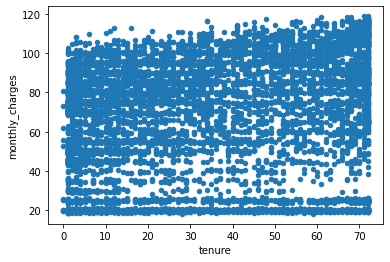

In [21]:
telco_churn.plot.scatter('tenure','monthly_charges')

#### α = 0.05
#### null hypothesis = There is no linear relationship between tenure and monthly charges.
#### alternative = There is a linear relationship between between  tenure and monthly charges.

In [16]:
telco = pd.read_csv('telco_churn.csv')
telco.head()
telco.TotalCharges = pd.to_numeric(telco.TotalCharges, errors='coerce')
telco = telco.replace(np.nan, 0)
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
α = 0.05
x1= telco.tenure
y1= telco.TotalCharges
r, p = stats.pearsonr(x1, y1)
r, p,
if p < α:
    print(f'Null hypothesis is rejected as p value({p}) is less than α')
    print(f'There is correlation between variables, tenure and total charges ')
else:
    print('Null hypothesis failed to be rejected')
    print('there is no correlation between two variables')

Null hypothesis is rejected as p value(0.0) is less than α
There is correlation between variables, tenure and total charges 


<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

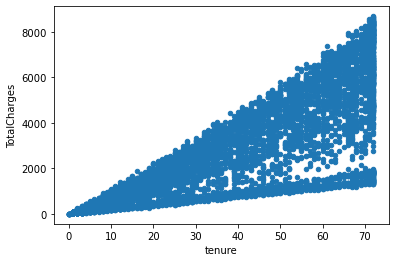

In [18]:
telco.plot.scatter('tenure', 'TotalCharges')

## Use the employees database.
### Is there a relationship between how long an employee has been with the company and their salary?
### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

## tenure and salary
##### α = 0.05
##### null hypothesis = There is no linear relationship between tenure and salary.
##### alternative = There is a linear relationship between between  tenure and salary.

In [9]:
url= f'mysql+pymysql://{env.username}:{env.password}@{env.host}/employees'
sql =''' select datediff(curdate(), e.hire_date) as tenure, salary from employees as e
join salaries as s using(emp_no)
where s.to_date >= now()
'''
employees =pd.read_sql(sql, url)
employees.head()

,tenure,salary
0,13151,88958
1,13368,72527
2,13088,43311
3,12993,74057
4,11977,94692


In [10]:
X = employees.tenure
Y = employees.salary
r,p = stats.pearsonr(X,Y)
r,p,α

(0.30646256131860783, 0.0, 0.05)

<AxesSubplot:xlabel='tenure', ylabel='salary'>

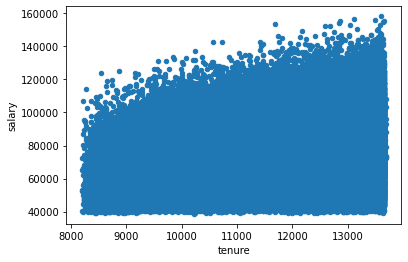

In [13]:
employees.plot.scatter('tenure','salary')

In [161]:
if p < α:
    print(f'p({p}) is less than α, hence null hypothesis is rejected ')
else:
        print(f'p({p}) is greater than α,  fail to reject null hypothesis')

p(0.0) is less than α, hence null hypothesis is rejected 


## tenure and number of titles
##### α = 0.05
##### null hypothesis = There is no linear relationship between tenure and salary.
##### alternative = There is a linear relationship between between  tenure and salary.

In [23]:
sql = '''select datediff(curdate(), e.hire_date) as tenure, t.emp_no, count(title) as titles
from employees as e
join titles as t using(emp_no)
group by t.emp_no
'''
url = url= f'mysql+pymysql://{env.username}:{env.password}@{env.host}/employees'
titles = pd.read_sql(sql,url)
titles.head()


,tenure,emp_no,titles
0,13151,10001,1
1,13368,10002,1
2,13088,10003,1
3,12993,10004,2
4,11977,10005,2


In [24]:
tenure = titles.tenure
number = titles.titles
r,p = stats.pearsonr(tenure, number)
r,p, α


(0.266598929913662, 0.0, 0.05)

In [25]:
if p< α:
    print(f'p value =({p}) which is less than α hence, null hypothesis is rejected ')
    print('There is a correlation between tenure and number of titles')
else:
    print('There is no cotrelation between tenure and number of titles')

p value =(0.0) which is less than α hence, null hypothesis is rejected 
There is a correlation between tenure and number of titles


<AxesSubplot:xlabel='tenure', ylabel='titles'>

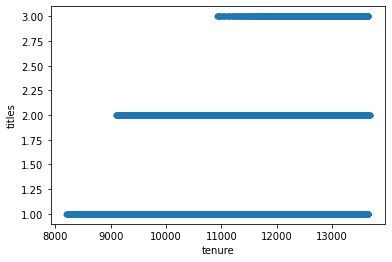

In [26]:
titles.plot.scatter('tenure','titles')

## Use the sleepstudy data. Is there a relationship between days and reaction time?

#### α = 0.05
#### null hypothesis = There is no linear relationship between days and reaction time.
#### alternative = There is a linear relationship between between days and reaction time.

In [27]:
from pydataset import data
sleep = data('sleepstudy')
sleep = pd.DataFrame(sleep)
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [28]:
α = 0.05
x2= sleep.Days
y2 = sleep.Reaction
r, p = stats.pearsonr(x2, y2)
r, p, α

(0.5352302262650253, 9.894096322214812e-15, 0.05)

In [29]:
if p < α:
    print(f'Null hypothesis rejected as p({p}) is less than α')
else:
    print(' Fail to reject Null Hypothesis')

Null hypothesis rejected as p(9.894096322214812e-15) is less than α


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

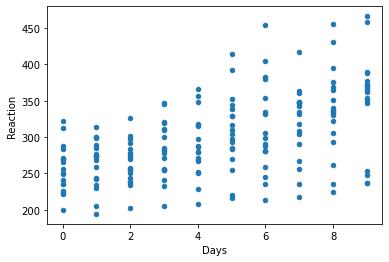

In [30]:
sleep.plot.scatter('Days','Reaction')